In [1]:
import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

C:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model = models.InceptionV1()
model.load_graphdef()

## Visualize 3 filters[one for image 0, another for image 1 another for image 2] These filters are positively optimized meaning this is the optimal patterns they detect

(3, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
0 [1245038.  1250032.6 1245650.8]



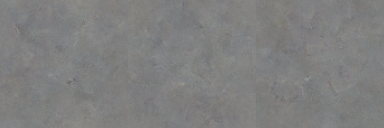

256 [5771876.  5823126.5 5807545.5]



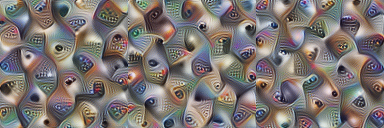

512 [7273373. 7320787. 7295414.]



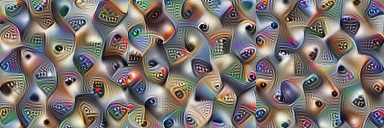

In [5]:
connection=lambda n,layer,batch: objectives.channel(n_channel=n,layer=layer,batch=batch)
tv=lambda layer: objectives.total_variation(layer=layer)
obj=connection(0,'mixed3a',0)+connection(1,'mixed3a',1)+connection(2,'mixed3a',2)+tv('mixed3a')
param_f=lambda: param.image(w=128,h=128,batch=3)
_=render.render_vis(model,param_f=param_f,objective_f=obj,thresholds=(0,256,512))

## Visualize 3 filters[one for image 0, another for image 1 another for image 2] These filters are negetively optimized meaning this is the patterns they will never detect

(3, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
0 35.475945



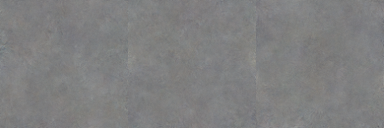

256 1981.604



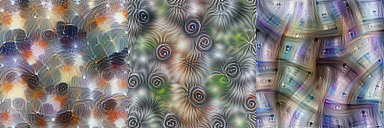

In [6]:
connection=lambda n,layer,batch: objectives.channel(n_channel=n,layer=layer,batch=batch)
obj=-connection(0,'mixed4a_pre_relu',0)-connection(1,'mixed4a_pre_relu',1)-connection(2,'mixed4a_pre_relu',2)
param_f=lambda: param.image(w=128,h=128,batch=3)
_=render.render_vis(model,param_f=param_f,objective_f=obj,thresholds=(0,256))

## Single channel(filter 1) visualization

(1, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
512 929.91724



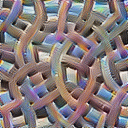

In [7]:
connection=lambda n,layer: objectives.channel(layer=layer,n_channel=n)
obj=connection(1,'mixed4a_pre_relu')
_=render.render_vis(model,obj,thresholds=(512,))

## Activations scaled to their probability and then optimised

(1, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
512 66.15928



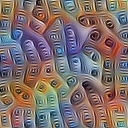

In [8]:
## mean
connection=lambda layer: objectives.sigmoid_prob(layer=layer)
obj=connection('mixed3a')
_=render.render_vis(model,obj,thresholds=(512,))

## Activations scaled to their probability and then optimised, but this time using reduce_sum function

(1, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
512 63.79544



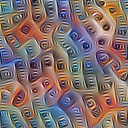

In [9]:
#sum
connection=lambda layer: objectives.sigmoid_prob(layer=layer)
obj=connection('mixed3a')
_=render.render_vis(model,obj,thresholds=(512,))

# Direction is used to artificially change the activations, usually influencing a direction(dimentions) positively or negetively

(1, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
512 66.0713



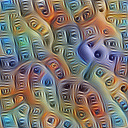

In [7]:
connection=lambda layer: objectives.direction(layer=layer,vec=np.ones_like(5))
obj=connection('mixed3a')
_=render.render_vis(model,obj,thresholds=(512,))

(1, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
512 67.2993



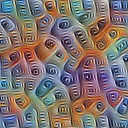

In [8]:
connection=lambda layer: objectives.direction(layer=layer,vec=np.ones_like(50))
obj=connection('mixed3a')
_=render.render_vis(model,obj,thresholds=(512,))

(1, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
512 60.6511



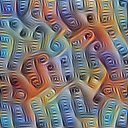

In [9]:
connection=lambda layer: objectives.direction(layer=layer,vec=np.ones_like(-50))
obj=connection('mixed3a')
_=render.render_vis(model,obj,thresholds=(512,))

## In below example, the objective function is penalized by L2 norm of the matrix there by regularising it. This is important to visualize your own model. You will have to play with it to get rid of noice

(1, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
256 880004860.0



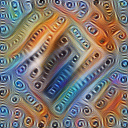

512 1223273900.0



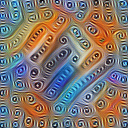

In [20]:
direction=lambda layer: objectives.direction(layer=layer,vec=np.ones_like(-50))
l2=lambda layer: objectives.L2(layer=layer)
obj=direction('mixed3a')+l2("mixed3a")*l2("mixed3a")
_=render.render_vis(model,obj,thresholds=(256,512,1024))

(1, 128, 128, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
256 57133.848



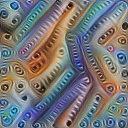

512 61821.023



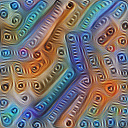

1024 54949.285



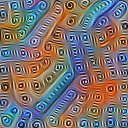

In [3]:
direction=lambda layer,n: objectives.channel(layer=layer,n_channel=n)
l2=lambda layer: objectives.L2(layer=layer)
obj=direction('mixed3a',0)+l2("mixed3a")*2
_=render.render_vis(model,obj,thresholds=(256,512,1024))